# **Hướng tiếp cận mới**

In [1]:
from tqdm import tqdm

tqdm.pandas()  # Kích hoạt tqdm cho pandas

In [2]:
import pandas as pd

import regex as re

import pandas as pd

import json


In [3]:
import pandas as pd

import regex as re

import json

from tqdm import tqdm

tqdm.pandas()

import json
import pandas as pd
from tqdm import tqdm

tqdm.pandas()  # To enable progress_apply

def preprocess_text(text):
    text = text.replace("\n", " ")
    return text

def extract_hashtags(text):
    """
    Extract hashtags from text and return both cleaned hashtags and text without hashtags
    """
    # Find all hashtags in the text
    hashtags = re.findall(r'#(\w+)', text)
    
    # Remove hashtags from the original text
    clean_text = re.sub(r'#\w+\s*', '', text).strip()
    
    # Join hashtags without the # symbol
    hashtags_str = ' '.join(hashtags) if hashtags else ''
    
    return hashtags_str, clean_text

def json_to_df(json_file_path):
    with open(json_file_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    # Convert JSON data to a DataFrame
    items = [{'image': value['image'], 'caption': value['caption'], 'label': value['label']} for value in data.values()]
    df = pd.DataFrame(items)

    # # Extract hashtags
    # df['hashtags'] = df['caption'].apply(lambda x: ' '.join([word for word in x.split() if word.startswith('#')]))

    # # Remove hashtags from caption
    # df['caption'] = df['caption'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))

    # Apply text preprocessing
    df['caption'] = df['caption'].progress_apply(preprocess_text)

    df[['hashtags', 'caption']] = pd.DataFrame(
        df['caption'].apply(extract_hashtags).tolist(), 
        index=df.index
    )
    return df



In [4]:
def csv_to_df(json_file_path):
    
    df = pd.read_csv(json_file_path)

    # # Extract hashtags
    # df['hashtags'] = df['caption'].apply(lambda x: ' '.join([word for word in x.split() if word.startswith('#')]))

    # # Remove hashtags from caption
    # df['caption'] = df['caption'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))

    # Apply text preprocessing
    df['caption'] = df['caption'].progress_apply(preprocess_text)
    df['evidence'] = df['evidence'].progress_apply(preprocess_text)
    return df

In [5]:
json_file_path = '/kaggle/input/vimmsd/vimmsd-train.json'

image_path = '/kaggle/input/vimmsd/training-images/train-images/'

df = json_to_df(json_file_path)

100%|██████████| 10805/10805 [00:00<00:00, 645254.57it/s]


In [6]:
# Tính độ dài của mỗi caption

df['caption_length'] = df['caption'].apply(len)



median_length = df['caption_length'].median()

mean_length = df['caption_length'].mean()

percentile_85 = df['caption_length'].quantile(0.85)

percentile_90 = df['caption_length'].quantile(0.95)



print("Độ dài trung bình:", mean_length)

print("Độ dài trung vị:", median_length)

print("Độ dài phân vị 85%:", percentile_85)

print("Độ dài phân vị 90%:", percentile_90)


Độ dài trung bình: 226.9975011568718
Độ dài trung vị: 63.0
Độ dài phân vị 85%: 536.0
Độ dài phân vị 90%: 1041.0


In [7]:
df

,image,caption,label,hashtags,caption_length
0,8ae451edcd8ebf697f8763ece249115813149c55733bf8...,Cô ấy trên mạng vs cô ấy ngoài đời =))),multi-sarcasm,,39
1,35370ffd6c791d6f8c4ab3dd4363ed468fab41e4824ee9...,Người tâm linh giao tiếp với người thực tế :))),not-sarcasm,,47
2,316fdd1477725b9fb1a55015ac06b68b92b50bd4303e08...,Hình như Trăng hôm nay đẹp quá mọi người ạ! 😃 😃,multi-sarcasm,canhco,47
3,8a0f34e0e30e4e5cfb306933c1d25fa801a5da78646b59...,MỌI NGƯỜI NGHĨ SAO VỀ PHÁT BIỂU CỦA SHARK VIỆT...,not-sarcasm,canhco,867
4,e517a5e95d1065886a7c815e82fe254381d4f9f4b244d4...,2 tay hai nàng chứ việc gì phải lệ hai hàng,multi-sarcasm,,43
...,...,...,...,...,...
10800,46ce5ad52085691fc81869c82e8222c0d737b34fedc2bd...,Lộn đầu rồi,not-sarcasm,,11
10801,f816f7152cca9c5899f818ce681cf0949c6964ea2fc5ae...,"Chào các bạn, mình là Goda Takeshi. Trong live...",not-sarcasm,Takeshi,457
10802,0accae8d37f9edc90b5f0a2f5f3cca773f5d01b5124302...,Cre: Hùynh Quốc Huy,not-sarcasm,,19
10803,bf125e295f85c0946940b789b2ba10106b2a85b9e70d88...,Anh hùng thật sự,not-sarcasm,,16


In [8]:
# Mean length: 234.54280425728828
# 85th percentile: 542.0

In [9]:
# Mean seq length: 79.09329014345211
# 85th seq percentile: 177.0

In [10]:
TEXT_LENGTH = 512

In [11]:
#Seq length
# Độ dài trung bình: 78.97584451642759
# Độ dài trung vị: 27.0
# Độ dài phân vị 85%: 177.0
# Độ dài phân vị 90%: 247.0

Downloading: "https://download.pytorch.org/models/resnet152-394f9c45.pth" to /root/.cache/torch/hub/checkpoints/resnet152-394f9c45.pth
100%|██████████| 230M/230M [00:01<00:00, 170MB/s]


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/558 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Extracting training features...


Extracting features: 100%|██████████| 271/271 [03:13<00:00,  1.40it/s]


Extracting validation features...


Extracting features: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 1/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 1 results:
Average train loss: 1.3676
Average validation loss: 1.2896

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.6835    0.4703    0.5572      1212
multi-sarcasm     0.5125    0.0970    0.1632       845
image-sarcasm     0.0747    0.6404    0.1338        89
 text-sarcasm     0.0099    0.2667    0.0191        15

     accuracy                         0.3299      2161
    macro avg     0.3201    0.3686    0.2183      2161
 weighted avg     0.5869    0.3299    0.3819      2161

Validation loss decreased (inf --> 1.289605). Saving model ...

Epoch 2/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 2 results:
Average train loss: 0.9432
Average validation loss: 1.0672

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.7093    0.6180    0.6605      1212
multi-sarcasm     0.5694    0.2426    0.3402       845
image-sarcasm     0.0909    0.7079    0.1611        89
 text-sarcasm     0.0577    0.2000    0.0896        15

     accuracy                         0.4720      2161
    macro avg     0.3568    0.4421    0.3129      2161
 weighted avg     0.6246    0.4720    0.5107      2161

Validation loss decreased (1.289605 --> 1.067187). Saving model ...

Epoch 3/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 3 results:
Average train loss: 0.7162
Average validation loss: 0.9308

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.6998    0.7269    0.7131      1212
multi-sarcasm     0.5802    0.3467    0.4341       845
image-sarcasm     0.1031    0.4494    0.1677        89
 text-sarcasm     0.0000    0.0000    0.0000        15

     accuracy                         0.5618      2161
    macro avg     0.3458    0.3808    0.3287      2161
 weighted avg     0.6236    0.5618    0.5766      2161

Validation loss decreased (1.067187 --> 0.930835). Saving model ...

Epoch 4/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.39it/s]



Epoch 4 results:
Average train loss: 0.5934
Average validation loss: 0.9622

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.6987    0.7384    0.7180      1212
multi-sarcasm     0.5703    0.3456    0.4304       845
image-sarcasm     0.1261    0.5056    0.2018        89
 text-sarcasm     0.0909    0.0667    0.0769        15

     accuracy                         0.5706      2161
    macro avg     0.3715    0.4141    0.3568      2161
 weighted avg     0.6207    0.5706    0.5798      2161


Epoch 5/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 5 results:
Average train loss: 0.4932
Average validation loss: 0.9402

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.7197    0.6947    0.7070      1212
multi-sarcasm     0.5650    0.4888    0.5241       845
image-sarcasm     0.1331    0.3708    0.1958        89
 text-sarcasm     0.0000    0.0000    0.0000        15

     accuracy                         0.5960      2161
    macro avg     0.3544    0.3886    0.3567      2161
 weighted avg     0.6300    0.5960    0.6095      2161


Epoch 6/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 6 results:
Average train loss: 0.4278
Average validation loss: 0.9034

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.7173    0.7054    0.7113      1212
multi-sarcasm     0.5563    0.5089    0.5315       845
image-sarcasm     0.1414    0.3034    0.1929        89
 text-sarcasm     0.0000    0.0000    0.0000        15

     accuracy                         0.6071      2161
    macro avg     0.3537    0.3794    0.3589      2161
 weighted avg     0.6256    0.6071    0.6147      2161

Validation loss decreased (0.930835 --> 0.903450). Saving model ...

Epoch 7/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.39it/s]



Epoch 7 results:
Average train loss: 0.4181
Average validation loss: 0.8796

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.7256    0.7285    0.7270      1212
multi-sarcasm     0.5866    0.5574    0.5716       845
image-sarcasm     0.1556    0.2360    0.1875        89
 text-sarcasm     0.0000    0.0000    0.0000        15

     accuracy                         0.6363      2161
    macro avg     0.3669    0.3805    0.3715      2161
 weighted avg     0.6427    0.6363    0.6390      2161

Validation loss decreased (0.903450 --> 0.879603). Saving model ...

Epoch 8/8


Validating: 100%|██████████| 68/68 [00:49<00:00,  1.38it/s]



Epoch 8 results:
Average train loss: 0.3912
Average validation loss: 0.8718

Validation Classification Report:
               precision    recall  f1-score   support

  not-sarcasm     0.7523    0.6691    0.7083      1212
multi-sarcasm     0.5710    0.6521    0.6088       845
image-sarcasm     0.1875    0.2360    0.2090        89
 text-sarcasm     0.0000    0.0000    0.0000        15

     accuracy                         0.6400      2161
    macro avg     0.3777    0.3893    0.3815      2161
 weighted avg     0.6529    0.6400    0.6439      2161

Validation loss decreased (0.879603 --> 0.871752). Saving model ...


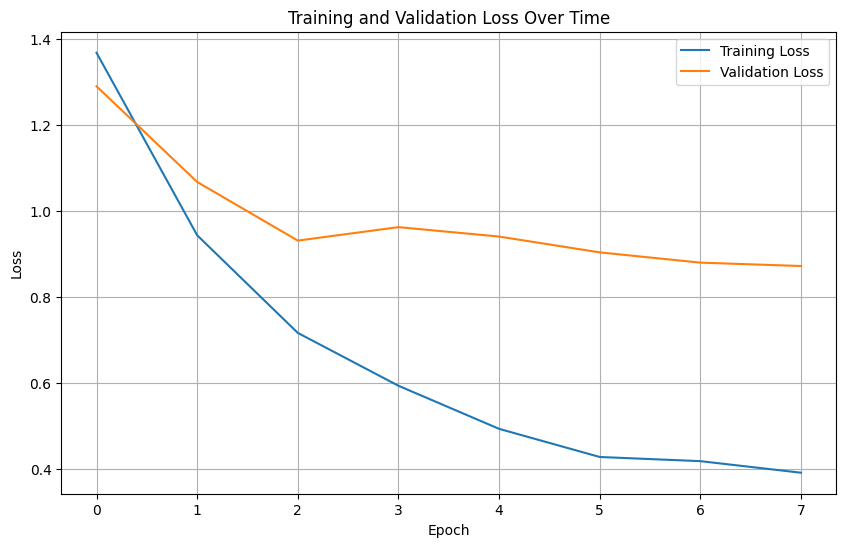

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from transformers import XLMRobertaTokenizer, ViTImageProcessor, PretrainedConfig, PreTrainedModel, XLMRobertaModel, ViTModel
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
from PIL import Image
import pandas as pd
import os
import numpy as np
from torchvision.models import resnet152, ResNet152_Weights
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report
import warnings
warnings.filterwarnings("ignore")

# Constants and label mapping
label_to_idx = {
    'multi-sarcasm': 1,
    'not-sarcasm': 0,
    'image-sarcasm': 2,
    'text-sarcasm': 3
}

# Set seed for reproducibility
def set_seed(seed=819):
    import random
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

class MultimodalDataset(Dataset):
    def __init__(self, df, image_folder_path, visobert_tokenizer,  vit_processor, is_test=False, max_length=128):
        self.df = df
        self.image_folder_path = image_folder_path
        self.visobert_tokenizer = visobert_tokenizer
        self.vit_processor = vit_processor
        self.is_test = is_test
        self.max_length = max_length
        
        self.transform = transforms.Compose([
            transforms.Resize((224, 224), antialias=True),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        try:
            image = Image.open(os.path.join(self.image_folder_path, row['image'])).convert('RGB')
        except Exception as e:
            print(f"Error loading image: {str(e)}")
            image = Image.new('RGB', (224, 224), color='gray')

        image_tensor = self.transform(image)
        
        # Combine caption and hashtags with a separator
        combined_text = f"{row['hashtags']} [SEP] {row['caption']}"
        
        visobert_inputs = self.visobert_tokenizer(
            combined_text, 
            padding='max_length',
            truncation=True,
            max_length=self.max_length,
            return_tensors='pt'
        )
        
        
        vit_inputs = self.vit_processor(images=image, return_tensors='pt')

        item = {
            'image1': image_tensor,
            'visobert_input_ids': visobert_inputs['input_ids'].squeeze(),
            'visobert_attention_mask': visobert_inputs['attention_mask'].squeeze(),
            'vit_pixel_values': vit_inputs['pixel_values'].squeeze(),
        }

        if not self.is_test:
            item['labels'] = torch.tensor(label_to_idx[row['label']], dtype=torch.long)
            
        return item

class MultimodalConfig(PretrainedConfig):
    model_type = "multimodal"

    def __init__(
        self,
        vision_model_name: str = "microsoft/resnet-152",  # Vision backbone (ResNet-152)
        visobert_model_name: str = "vinai/phobert-large",  # VisoBERT model
        xlm_roberta_model_name: str = "xlm-roberta-large",  # XLM-Roberta model
        vit_model_name: str = "google/vit-base-patch16-224",  # ViT model
        num_labels: int = 4,  # Number of output classes
        hidden_size: int = 768,  # Hidden size for transformers (BERT, Roberta, ViT)
        num_hidden_layers: int = 2,  # Number of hidden layers in MLP head
        **kwargs
    ):
        super().__init__(**kwargs)
        self.vision_model_name = vision_model_name
        self.visobert_model_name = visobert_model_name
        self.xlm_roberta_model_name = xlm_roberta_model_name
        self.vit_model_name = vit_model_name
        self.num_labels = num_labels
        self.hidden_size = hidden_size
        self.num_hidden_layers = num_hidden_layers

from transformers import AutoModel, AutoTokenizer, ViTModel,BertModel,BertTokenizer
from sklearn.model_selection import train_test_split
import torch.nn as nn

import torch
import torch.nn as nn
from transformers import PreTrainedModel, AutoModel, ViTModel
from torchvision.models import resnet152, ResNet152_Weights

class MultimodalModel(PreTrainedModel):
    config_class = MultimodalConfig
    
    def __init__(self, config):
        super().__init__(config)
        
        # Image Processing Models (unchanged)
        self.resnet = resnet152(weights=ResNet152_Weights.IMAGENET1K_V1)
        modules = list(self.resnet.children())[:-2]
        self.resnet = nn.Sequential(*modules)
        self.adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))
        
        self.vit = ViTModel.from_pretrained(config.vit_model_name)
        
        # Text Processing Model - Only VisoBERT
        self.visobert = AutoModel.from_pretrained(config.xlm_roberta_model_name)
        self.visobert_hidden_size = self.visobert.config.hidden_size  # Usually 768
        
        # Freeze pretrained models
        for model in [self.resnet, self.vit, self.visobert]:
            for param in model.parameters():
                param.requires_grad = False
        
        # Text Feature Projection
        self.visobert_projection = nn.Sequential(
            nn.Linear(self.visobert_hidden_size, 512),
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        # Text LSTM
        self.text_lstm = nn.LSTM(
            input_size=512,  # VisoBERT projection size
            hidden_size=256,
            num_layers=2,
            batch_first=True,
            bidirectional=True,
            dropout=0.3
        )
        
        # Text output projection
        self.text_output_projection = nn.Sequential(
            nn.Linear(512, 512),  # 512 from bidirectional LSTM (256*2)
            nn.LayerNorm(512),
            nn.GELU(),
            nn.Dropout(0.3)
        )
        
        # Image Feature Fusion (unchanged)
        self.image_fusion = nn.Sequential(
            nn.Linear(2048 + 768, 1024),  # ResNet (2048) + ViT (768)
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(1024, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        self.image_final_projection = nn.Sequential(
            nn.Linear(1024, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3)
        )
        
        # Classifier (unchanged)
        self.classifier = nn.Sequential(
            nn.Linear(1024, 512),  # Combined features (512 + 512)
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LayerNorm(256),
            nn.GELU(),
            nn.Dropout(0.3),
            nn.Linear(256, config.num_labels)
        )

    def process_image(self, image, vit_pixel_values):
        # ResNet features
        resnet_features = self.resnet(image)
        resnet_features = self.adaptive_pool(resnet_features)
        resnet_features = resnet_features.view(resnet_features.size(0), -1)
        
        # ViT features
        vit_output = self.vit(pixel_values=vit_pixel_values)
        vit_features = vit_output.last_hidden_state[:, 0, :]
        
        # Combine and process image features
        combined_image = torch.cat([resnet_features, vit_features], dim=1)
        fused_image = self.image_fusion(combined_image)
        final_image = self.image_final_projection(fused_image)
        
        return final_image
        
    def process_text(self, visobert_input_ids, visobert_attention_mask):
        # Get text embeddings with VisoBERT only
        visobert_output = self.visobert(
            input_ids=visobert_input_ids,
            attention_mask=visobert_attention_mask
        )
        
        # Get pooled output (using CLS token)
        visobert_pooled = visobert_output.last_hidden_state[:, 0, :]
        
        # Project embeddings
        visobert_proj = self.visobert_projection(visobert_pooled)
        
        # Process through LSTM
        lstm_output, _ = self.text_lstm(visobert_proj.unsqueeze(1))
        final_hidden = lstm_output[:, -1, :]
        
        # Final projection
        text_features = self.text_output_projection(final_hidden)
        return text_features

    def forward(self, image1, visobert_input_ids, visobert_attention_mask,
                vit_pixel_values, labels=None):
        
        image_features = self.process_image(image1, vit_pixel_values)
        text_features = self.process_text(
            visobert_input_ids, visobert_attention_mask
        )
        
        combined_features = torch.cat([image_features, text_features], dim=1)
        logits = self.classifier(combined_features)
        
        loss = None
        if labels is not None:
            loss_fct = nn.CrossEntropyLoss()
            loss = loss_fct(logits.view(-1, self.config.num_labels), labels.view(-1))
        
        return {"loss": loss, "logits": logits} if loss is not None else {"logits": logits}

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted', zero_division=1)
    acc = accuracy_score(labels, preds)
    return {'accuracy': acc, 'f1': f1, 'precision': precision, 'recall': recall}

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

import torch

import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def evaluate_and_visualize(trainer, eval_loader, dataset_name):
    # Run predictions on the evaluation loader (dev or test)
    predictions, labels, _ = trainer.predict(eval_loader.dataset)
    
    # Convert predictions from numpy array to torch tensor
    predictions = torch.tensor(predictions)
    
    # Use torch.argmax to get predicted class indices
    preds = torch.argmax(predictions, dim=1)
    
    # Compute accuracy
    accuracy = accuracy_score(labels, preds)
    
    # Compute precision, recall, f1-score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    
    print(f"{dataset_name} Accuracy: {accuracy}")
    print(f"{dataset_name} Precision: {precision}")
    print(f"{dataset_name} Recall: {recall}")
    print(f"{dataset_name} F1-score: {f1}")
    
    # Confusion matrix
    conf_matrix = confusion_matrix(labels, preds)
    
    # Visualize confusion matrix using Seaborn
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
    plt.title(f'Confusion Matrix - {dataset_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()



import torch.nn.functional as F
import torch.optim as optim
from transformers import get_linear_schedule_with_warmup

class FocalLossWithClassWeights(nn.Module):
    def __init__(self, alpha=2, gamma=2, reduction='mean', class_weights=None):
        super(FocalLossWithClassWeights, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction
        self.class_weights = class_weights

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, weight=self.class_weights, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

def calculate_class_weights(labels):
    class_counts = np.bincount(labels)
    total_samples = len(labels)
    class_weights = total_samples / (len(class_counts) * class_counts)
    return torch.FloatTensor(class_weights)

# Early Stopping
class EarlyStopping:
    def __init__(self, patience=3, verbose=False, delta=0):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.Inf
        self.delta = delta

    def __call__(self, val_loss, model):
        score = -val_loss
        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            print(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}). Saving model ...')
        torch.save(model.state_dict(), 'checkpoint.pt')
        self.val_loss_min = val_loss
        

from torch.utils.data import WeightedRandomSampler
from imblearn.over_sampling import SMOTE
import numpy as np

def create_balanced_sampler(labels):
    """
    Create a WeightedRandomSampler to balance the classes during training
    """
    # Calculate class weights
    class_counts = np.bincount(labels)
    class_weights = 1. / class_counts
    weights = class_weights[labels]
    
    # Create sampler
    sampler = WeightedRandomSampler(
        weights=weights,
        num_samples=len(labels),
        replacement=True
    )
    return sampler
class FeatureExtractor(torch.nn.Module):
    def __init__(self, model):
        super().__init__()
        self.model = model
        
    def forward(self, batch):
        # Get image features
        image_features = self.model.process_image(batch['image1'], batch['vit_pixel_values'])
        
        # Get text features
        text_features = self.model.process_text(
            batch['visobert_input_ids'],
            batch['visobert_attention_mask'],
        )
        
        # Combine features (this is the fusion step)
        combined_features = torch.cat([image_features, text_features], dim=1)
        return combined_features

def extract_features(model, data_loader, device):
    model.eval()
    feature_extractor = FeatureExtractor(model)
    feature_extractor = feature_extractor.to(device)
    
    all_features = []
    all_labels = []
    
    with torch.no_grad():
        for batch in tqdm(data_loader, desc='Extracting features'):
            # Move batch to device
            batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v 
                    for k, v in batch.items()}
            
            # Extract features
            features = feature_extractor(batch)
            
            # Store features and labels
            all_features.append(features.cpu().numpy())
            all_labels.append(batch['labels'].cpu().numpy())
    
    # Concatenate all features and labels
    features = np.concatenate(all_features, axis=0)
    labels = np.concatenate(all_labels, axis=0)
    
    return features, labels

def train_model(df, image_folder_path):
    set_seed(819)
    # Create balanced splits
    train_df, dev_df = train_test_split(
        df,
        test_size=0.2,
        stratify=df['label'],
        random_state=819
    )
    # Initialize model, loss, optimizer, and scheduler
    config = MultimodalConfig(num_labels=4)
    model = MultimodalModel(config)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = model.to(device)
    
    # Initialize tokenizers and feature extractors
    visobert_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-large")
    vit_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')

    # Create datasets using the split dataframes
    train_dataset = MultimodalDataset(
        train_df, 
        image_folder_path, 
        visobert_tokenizer, 
        vit_processor
    )
    
    dev_dataset = MultimodalDataset(
        dev_df, 
        image_folder_path, 
        visobert_tokenizer, 
        vit_processor
    )

    # Calculate class weights and create data loaders
    train_labels = [label_to_idx[row['label']] for _, row in train_df.iterrows()]
    train_sampler = create_balanced_sampler(train_labels)
    class_weights = calculate_class_weights(train_labels)
    
    train_loader = DataLoader(
        train_dataset, 
        batch_size=32, 
        sampler=train_sampler,
        num_workers=4
    )
    
    dev_loader = DataLoader(
        dev_dataset, 
        batch_size=32, 
        shuffle=False, 
        num_workers=4
    )
    
    # Initialize feature extractor
    feature_extractor = FeatureExtractor(model)
    feature_extractor = feature_extractor.to(device)
    
    # Extract features before training
    print("Extracting training features...")
    train_features, train_labels = extract_features(
        model, train_loader, device
    )
    
    print("Extracting validation features...")
    val_features, val_labels = extract_features(
        model, dev_loader, device
    )
    
    
    loss_fn = FocalLossWithClassWeights(class_weights=class_weights.to(device))
    optimizer = optim.AdamW(model.parameters(), lr=5e-5, weight_decay=1e-2)
    num_epochs = 8  # Increased epochs since we're using early stopping
    total_steps = len(train_loader) * num_epochs
    scheduler = get_linear_schedule_with_warmup(
        optimizer,
        num_warmup_steps=int(0.1 * total_steps),
        num_training_steps=total_steps
    )

    # Initialize early stopping
    early_stopping = EarlyStopping(patience=3, verbose=True, delta=1e-4)
    
    # Training tracking variables
    train_losses = []
    val_losses = []

    # Training loop
    for epoch in range(num_epochs):
        print(f'\nEpoch {epoch+1}/{num_epochs}')
        
        # Training phase
        model.train()
        train_loss = 0
        progress_bar = tqdm(train_loader, desc=f'Training')
        
        for batch in progress_bar:
            batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v 
                    for k, v in batch.items()}
            
            outputs = model(
                image1=batch['image1'],
                visobert_input_ids=batch['visobert_input_ids'],
                visobert_attention_mask=batch['visobert_attention_mask'],
                vit_pixel_values=batch['vit_pixel_values'],
                labels=batch['labels']
            )
            
            loss = outputs['loss']
            
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            
            optimizer.step()
            scheduler.step()
            
            train_loss += loss.item()
            progress_bar.set_postfix({'train_loss': f'{loss.item():.4f}'})
        
        avg_train_loss = train_loss / len(train_loader)
        train_losses.append(avg_train_loss)
        
        # Validation phase
        model.eval()
        val_loss = 0
        all_preds = []
        all_labels = []
        
        with torch.no_grad():
            for batch in tqdm(dev_loader, desc='Validating'):
                batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v 
                        for k, v in batch.items()}
                
                outputs = model(
                    image1=batch['image1'],
                    visobert_input_ids=batch['visobert_input_ids'],
                    visobert_attention_mask=batch['visobert_attention_mask'],
                    vit_pixel_values=batch['vit_pixel_values'],
                    labels=batch['labels']
                )
                
                loss = outputs['loss']
                val_loss += loss.item()
                
                logits = outputs['logits']
                preds = torch.argmax(logits, dim=1)
                
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(batch['labels'].cpu().numpy())
        
        avg_val_loss = val_loss / len(dev_loader)
        val_losses.append(avg_val_loss)
        
        # Print epoch results
        print(f'\nEpoch {epoch+1} results:')
        print(f'Average train loss: {avg_train_loss:.4f}')
        print(f'Average validation loss: {avg_val_loss:.4f}')
        
        # Print classification report
        label_names = ['not-sarcasm', 'multi-sarcasm', 'image-sarcasm', 'text-sarcasm']
        print('\nValidation Classification Report:')
        print(classification_report(all_labels, all_preds, target_names=label_names, digits=4))
        
        # Early stopping check
        early_stopping(avg_val_loss, model)
        
        if early_stopping.early_stop:
            print(f"Early stopping triggered after epoch {epoch+1}")
            break

    # Load the best model
    model.load_state_dict(torch.load('checkpoint.pt'))

    # Plot training curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss Over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    return model

if __name__ == "__main__":
    json_file_path = '/kaggle/input/vimmsd/vimmsd-train.json'
    image_folder_path = '/kaggle/input/vimmsd/training-images/train-images/'
    train_model(df, image_folder_path)

In [13]:
import torch
from torch.utils.data import DataLoader
from transformers import AutoTokenizer, ViTFeatureExtractor
import json
import logging
from tqdm import tqdm
import os
import pandas as pd

# Set up logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

def load_trained_model(model_path, device):
    """Load trained model with weights"""
    if not os.path.exists(model_path):
        raise FileNotFoundError(f"Model file not found at: {model_path}")
        
    try:
        # Initialize model with same configuration as training
        config = MultimodalConfig(num_labels=4)
        model = MultimodalModel(config)
        
        # Load the saved model weights
        model.load_state_dict(torch.load(model_path, map_location=device))
        model = model.to(device)
        model.eval()
        
        logger.info(f"Model loaded successfully from {model_path}")
        return model
    except Exception as e:
        logger.error(f"Error loading model: {str(e)}")
        raise

# def json_to_df(json_file_path):
#     """Convert JSON file to pandas DataFrame with specific structure"""
#     try:
#         # Load and process JSON file
#         with open(json_file_path, 'r', encoding='utf-8') as f:
#             data = json.load(f)
            
#         # Create DataFrame with specific structure
#         items = [{'image': value['image'], 
#                  'caption': value['caption'], 
#                  'label': value['label']} 
#                 for value in data.values()]
                
#         df = pd.DataFrame(items)
        
#         # Preprocess captions
#         tqdm.pandas()  # Enable progress bar for pandas operations
#         # Loại bỏ hashtags khỏi caption
# #         df['caption'] = df['caption'].apply(lambda x: ' '.join([word for word in x.split() if not word.startswith('#')]))
#         df['caption'] = df['caption'].progress_apply(preprocess_text)
        
#         return df
        
#     except Exception as e:
#         logger.error(f"Error processing JSON file: {str(e)}")
#         raise

def predict_with_model(model, test_df, image_folder_path, batch_size=32):
    """Run predictions with trained model"""
    if not os.path.exists(image_folder_path):
        raise FileNotFoundError(f"Image folder not found at: {image_folder_path}")
        
    try:
        device = next(model.parameters()).device
        logger.info(f"Using device: {device}")

        # Initialize tokenizers and processors
        visobert_tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-large")
        vit_processor = ViTImageProcessor.from_pretrained('google/vit-base-patch16-224')
        
        # Create test dataset
        test_dataset = MultimodalDataset(
            test_df, 
            image_folder_path, 
            visobert_tokenizer, 
            vit_processor,
            is_test=True
        )
        
        test_loader = DataLoader(
            test_dataset, 
            batch_size=batch_size, 
            shuffle=False,
            num_workers=4 if torch.cuda.is_available() else 0
        )

        # Make predictions
        model.eval()
        all_preds = []
        
        with torch.no_grad():
            for batch in tqdm(test_loader, desc="Making predictions"):
                batch = {k: v.to(device) if isinstance(v, torch.Tensor) else v 
                        for k, v in batch.items()}
                
                outputs = model(
                    image1=batch['image1'],
                    visobert_input_ids=batch['visobert_input_ids'],
                    visobert_attention_mask=batch['visobert_attention_mask'],
                    vit_pixel_values=batch['vit_pixel_values']
                )
                
                logits = outputs['logits']
                preds = torch.argmax(logits, dim=1)
                all_preds.extend(preds.cpu().numpy())

        # Convert predictions to labels
        label_names = ['not-sarcasm', 'multi-sarcasm', 'image-sarcasm', 'text-sarcasm']
        predicted_labels = [label_names[pred] for pred in all_preds]
        
        # Create predictions dictionary
        predictions_dict = {
            str(idx): label 
            for idx, label in enumerate(predicted_labels)
        }
        
        return predictions_dict

    except Exception as e:
        logger.error(f"Error during prediction: {str(e)}")
        raise

def run_testing_pipeline(json_file_path, image_folder_path, model_path, output_path, phase="test"):
    """Complete testing pipeline"""
    try:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        logger.info(f"Using device: {device}")
        
        # Load and process test data
        logger.info("Loading test data...")
        test_df = json_to_df(json_file_path)
        
        # Load model
        logger.info("Loading model...")
        config = MultimodalConfig(num_labels=4)
        model = MultimodalModel(config)
        model.load_state_dict(torch.load(model_path, map_location=device))
        model = model.to(device)
        model.eval()
        
        # Make predictions
        logger.info("Making predictions...")
        predictions_dict = predict_with_model(model, test_df, image_folder_path)
        
        # Save results
        logger.info("Saving predictions...")
        output = {
            "results": predictions_dict,
            "phase": phase
        }
        
        output_dir = os.path.dirname(output_path)
        if output_dir:
            os.makedirs(output_dir, exist_ok=True)
            
        with open(output_path, "w") as f:
            json.dump(output, f, indent=4)
        
        logger.info(f"Testing pipeline completed successfully! Results saved to {output_path}")
        return predictions_dict
        
    except Exception as e:
        logger.error(f"Error in testing pipeline: {str(e)}")
        raise
# Example usage
if __name__ == "__main__":
    try:
        json_file_path = "/kaggle/input/vimmsd/vimmsd-private-test.json"
        image_folder_path = "/kaggle/input/vimmsd/private-test-images/test-images/"
        model_path = "/kaggle/working/checkpoint.pt"
        output_path = "./results.json"

        predictions = run_testing_pipeline(
            json_file_path=json_file_path,
            image_folder_path=image_folder_path,
            model_path=model_path,
            output_path=output_path,
            phase="test"
        )
        print("Prediction completed successfully!")

    except Exception as e:
        logger.error(f"Pipeline failed: {str(e)}")
        raise

100%|██████████| 1504/1504 [00:00<00:00, 547162.22it/s]
Some weights of ViTModel were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized: ['vit.pooler.dense.bias', 'vit.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Making predictions: 100%|██████████| 47/47 [00:34<00:00,  1.36it/s]

Prediction completed successfully!
